In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the input image
    image = cv2.imread(image_path)

    # Preprocessing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Image enhancement
    def enhance_brightness(image, value):
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        v = cv2.add(v, value)
        v = np.clip(v, 0, 255)
        enhanced_hsv = cv2.merge((h, s, v))
        enhanced_image = cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2BGR)
        return enhanced_image

    def enhance_sharpness(image,kernel):
        kernel = np.array([[-1,-1,-1], 
                              [-1,8,-1], 
                              [-1,-1,-1]])
        enhanced_image = cv2.filter2D(image, -1, kernel)
        return enhanced_image

    def enhance_color(image, value):
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        s = cv2.add(s, value)
        s = np.clip(s, 0, 255)
        enhanced_hsv = cv2.merge((h, s, v))
        enhanced_image = cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2BGR)
        return enhanced_image

    def enhance_contrast(image, value):
        enhanced_image = cv2.convertScaleAbs(image, alpha=value)
        return enhanced_image

    # Enhance brightness, sharpness, color, and contrast
    enhanced_image = enhance_brightness(image, 30)  # Increase brightness by 30 units
    enhanced_image = enhance_sharpness(enhanced_image, 0.5)  # Increase sharpness by 0.5
    enhanced_image = enhance_color(enhanced_image, 30)  # Increase color saturation by 30 units
    enhanced_image = enhance_contrast(enhanced_image, 1.5)  # Increase contrast by 1.5

    return enhanced_image


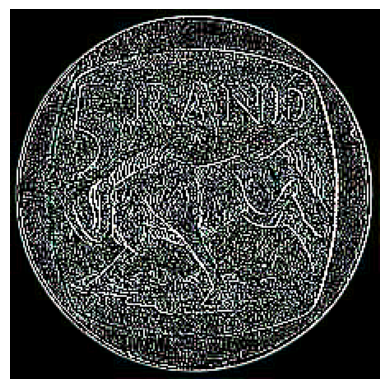

In [2]:
preprocessed_image = preprocess_image(r"C:\Users\noluv\Downloads\Coins\Coins\5-1.jpeg")
#cv2.imshow("Preprocessed Image", preprocessed_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axes
plt.show()

In [3]:
def image_segmentation(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Global Thresholding
    ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Adaptive Thresholding
    blurred_image = cv2.medianBlur(gray, 5)
    thresh2 = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Canny Edge Detection
    edges = cv2.Canny(gray, 100, 200)

    # Plot the images
    plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 2, 2), plt.imshow(thresh1, cmap='gray')
    plt.title('Global Thresholding'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 2, 3), plt.imshow(thresh2, cmap='gray')
    plt.title('Adaptive Thresholding'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 2, 4), plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    plt.show()

    # Return the segmented images
    return thresh1, thresh2, edges



def feature_extraction(image):
    # Find contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contour
    areas = [cv2.contourArea(cnt) for cnt in contours]
    max_area_index = np.argmax(areas)
    largest_contour = contours[max_area_index]
    
    # Calculate perimeter
    perimeter = cv2.arcLength(largest_contour, True)

    # Calculate other features as desired
    
    # Return the extracted features
    return perimeter, areas[max_area_index]




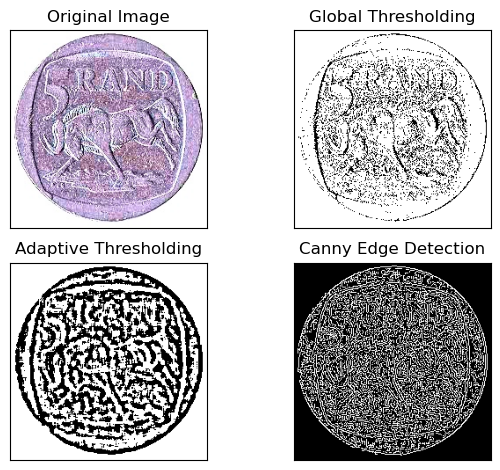

Perimeter (Global Thresholding): 896.0
Area (Global Thresholding): 50176.0
Perimeter (Adaptive Thresholding): 896.0
Area (Adaptive Thresholding): 50176.0
Perimeter (Canny Edge Detection): 5963.5023156404495
Area (Canny Edge Detection): 3292.5


In [4]:
# Perform image segmentation on the preprocessed image
thresh1, thresh2, edges = image_segmentation(r"C:\Users\noluv\Downloads\preprocessed_image.jpg")

# Extract features from the segmented images
perimeter1, area1 = feature_extraction(thresh1)
perimeter2, area2 = feature_extraction(thresh2)
perimeter3, area3 = feature_extraction(edges)

# Print the extracted features
print('Perimeter (Global Thresholding):', perimeter1)
print('Area (Global Thresholding):', area1)
print('Perimeter (Adaptive Thresholding):', perimeter2)
print('Area (Adaptive Thresholding):', area2)
print('Perimeter (Canny Edge Detection):', perimeter3)
print('Area (Canny Edge Detection):', area3)

In [5]:
import os
import imghdr

# Directory containing the images to be preprocessed
input_directory = "C:/Users/noluv/Downloads/Coins/Coins"

# Directory to save the preprocessed images
output_directory = "C:/Users/noluv/Downloads/preprocessed_Images"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Preprocess all images in the input directory
for entry in os.scandir(input_directory):
    #print(entry)
    if entry.is_file():
        # Check if the file is an image
        image_type = imghdr.what(entry.path)
        #print(image_type)
        if image_type in ['jpeg', 'png']:
            # Preprocess the image
            preprocessed_image = preprocess_image(entry.path)

            # Get the base file name without extension
            filename = os.path.splitext(entry.name)[0]

            # Save the preprocessed image to the output directory
            output_path = os.path.join(output_directory, f'{filename}_preprocessed.jpg')
            cv2.imwrite(output_path, preprocessed_image)

            

<DirEntry '10c.jpg'>
10c
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\10c_preprocessed.jpg


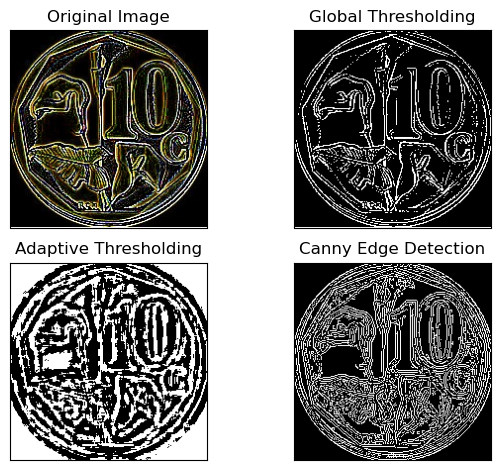

<DirEntry '10c_O 1.png'>
10c
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\10c_O 1_preprocessed.jpg


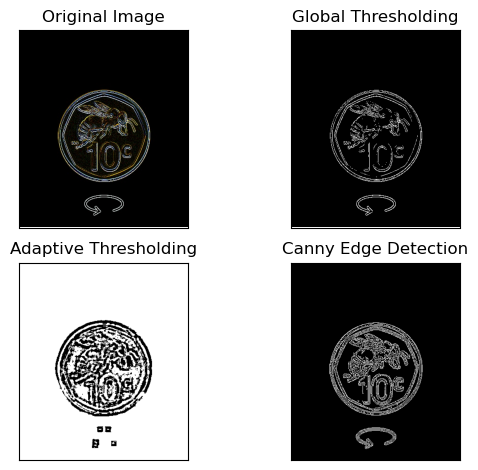

<DirEntry '10c_R1.png'>
10c
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\10c_R1_preprocessed.jpg


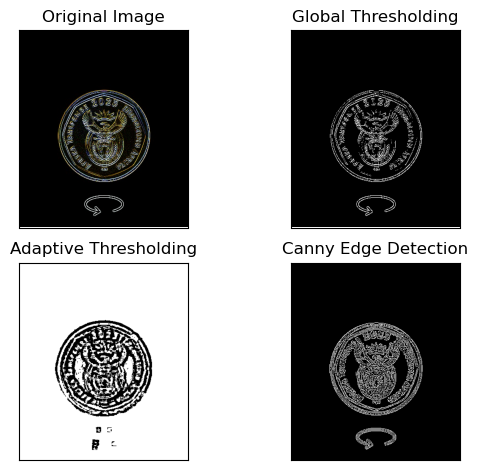

<DirEntry '20c.jpg'>
20c
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\20c_preprocessed.jpg


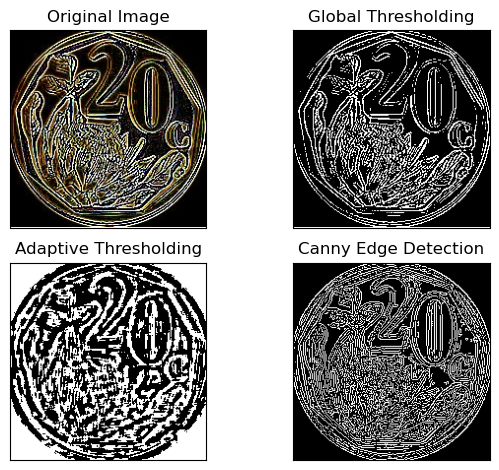

<DirEntry '20c_O 1.png'>
20c
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\20c_O 1_preprocessed.jpg


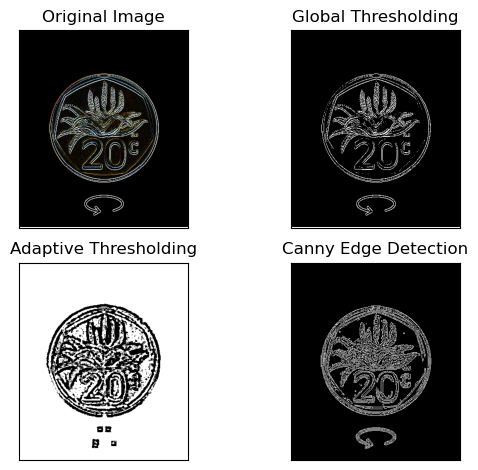

<DirEntry '20c_R1.png'>
20c
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\20c_R1_preprocessed.jpg


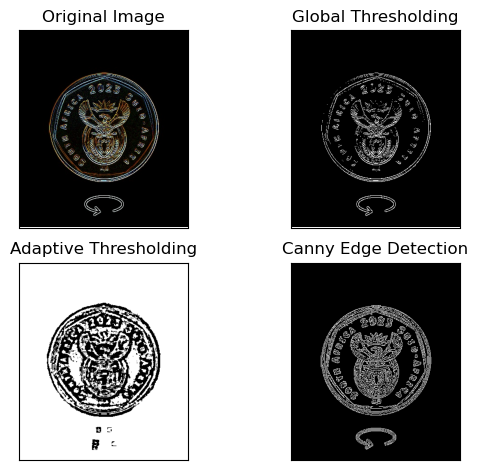

<DirEntry '5-1.jpeg'>
unknown
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\5-1_preprocessed.jpg


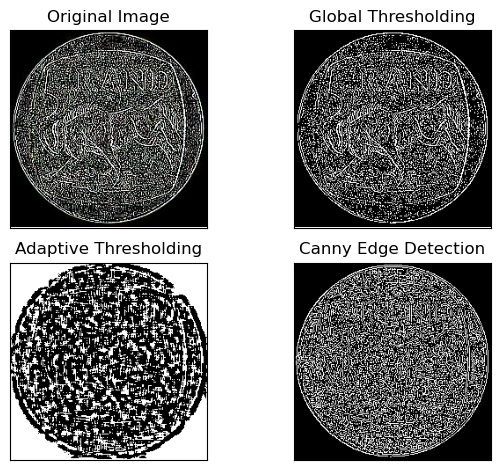

<DirEntry '5-2.jpeg'>
unknown
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\5-2_preprocessed.jpg


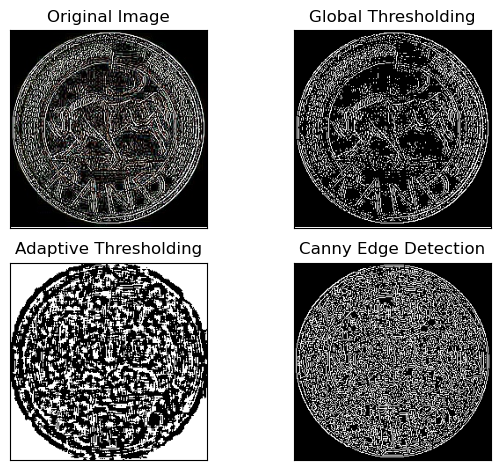

<DirEntry '5-3.jpeg'>
unknown
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\5-3_preprocessed.jpg


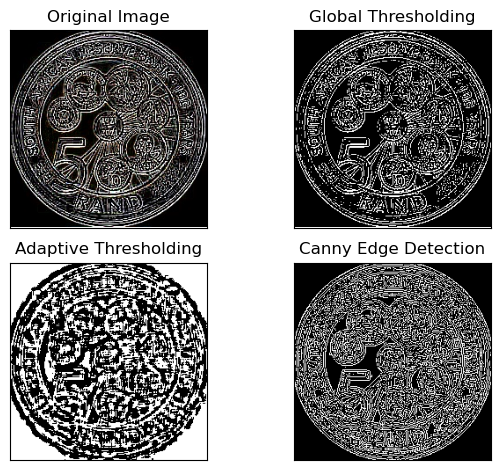

<DirEntry '5-4.jpeg'>
unknown
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\5-4_preprocessed.jpg


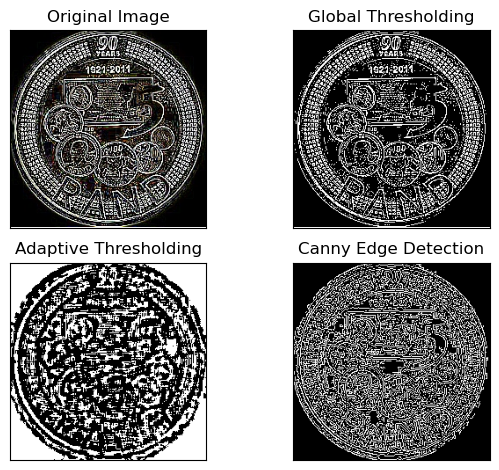

<DirEntry '5-5.jpeg'>
unknown
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\5-5_preprocessed.jpg


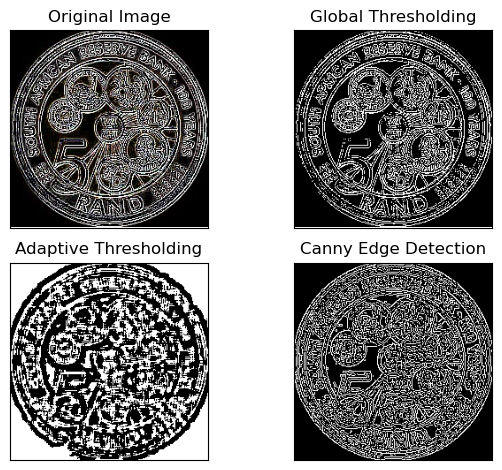

<DirEntry '5-6.jpeg'>
unknown
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\5-6_preprocessed.jpg


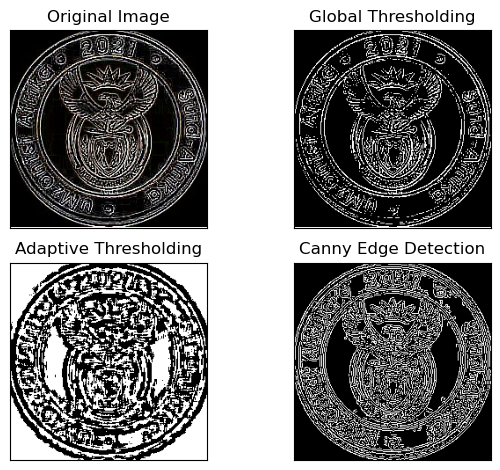

<DirEntry '50c.jpg'>
unknown
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\50c_preprocessed.jpg


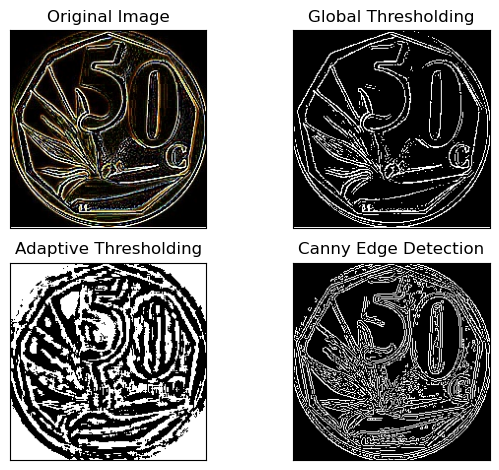

<DirEntry '50c_O1.png'>
unknown
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\50c_O1_preprocessed.jpg


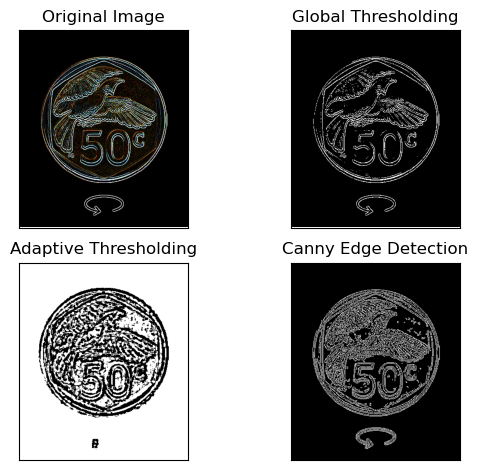

<DirEntry '50c_R1.png'>
R1
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\50c_R1_preprocessed.jpg


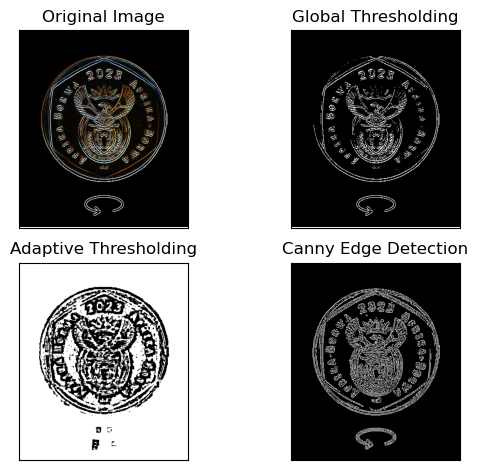

<DirEntry '55.jpeg'>
R5
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\55_preprocessed.jpg


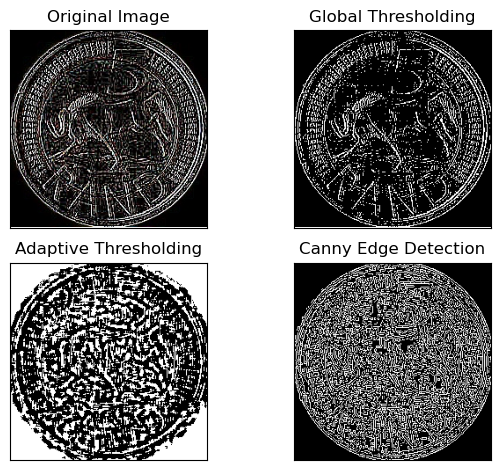

<DirEntry 'C.jpeg'>
mixture
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\C_preprocessed.jpg


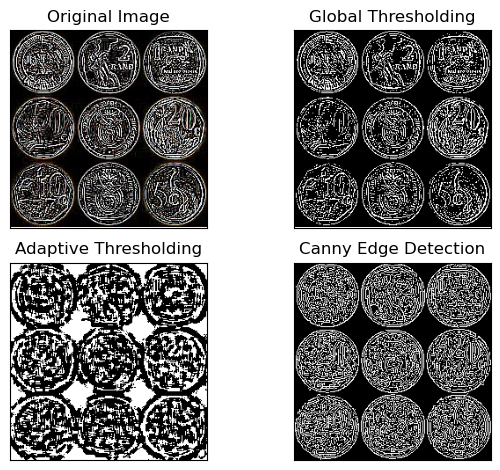

<DirEntry 'Coins.jpeg'>
mixture
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\Coins_preprocessed.jpg


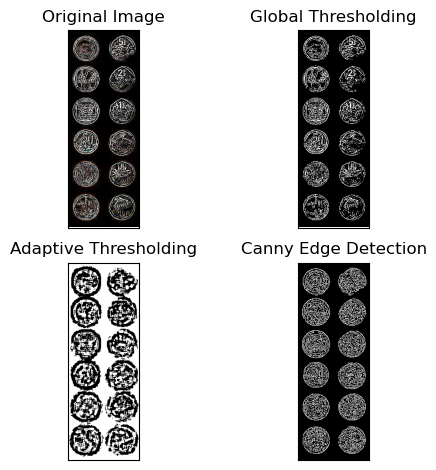

<DirEntry 'R1.jpg'>
R1
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\R1_preprocessed.jpg


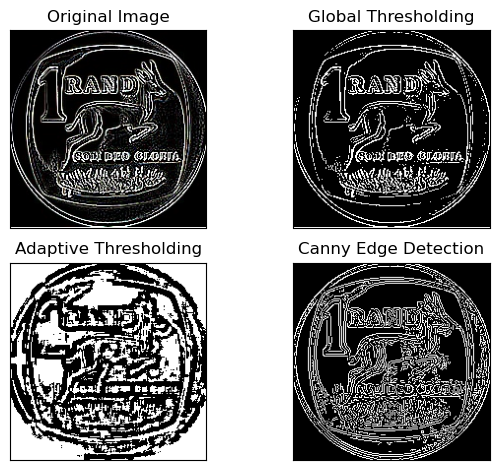

<DirEntry 'R1_O 1.png'>
R1
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\R1_O 1_preprocessed.jpg


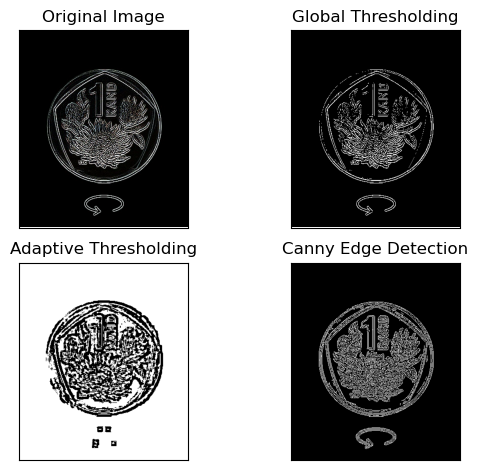

<DirEntry 'R1_R1.png'>
R1
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\R1_R1_preprocessed.jpg


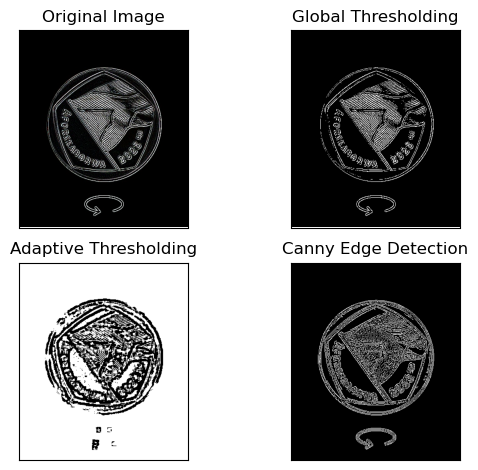

<DirEntry 'R2.jpg'>
R2
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\R2_preprocessed.jpg


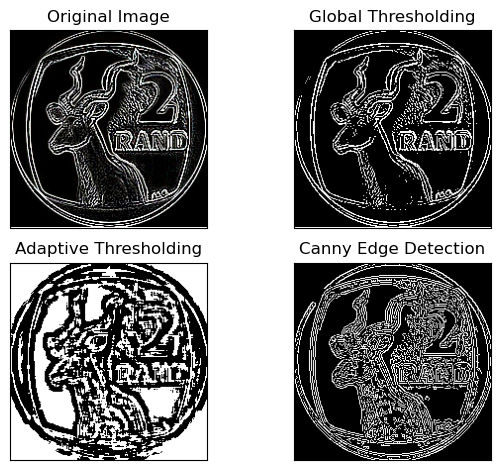

<DirEntry 'R2_O1.png'>
R2
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\R2_O1_preprocessed.jpg


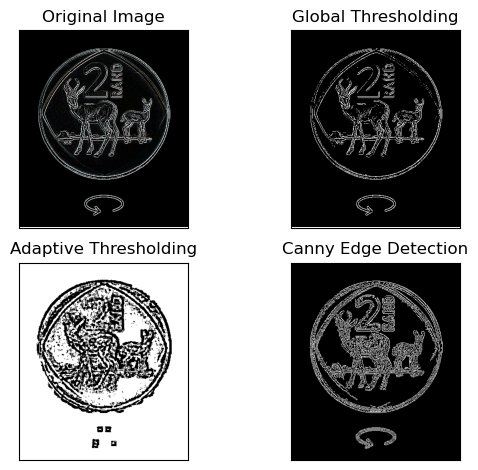

<DirEntry 'R2_R1.png'>
R1
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\R2_R1_preprocessed.jpg


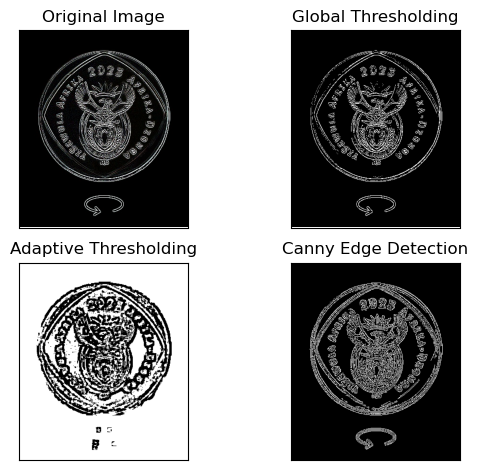

<DirEntry 'R5.jpg'>
R5
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\R5_preprocessed.jpg


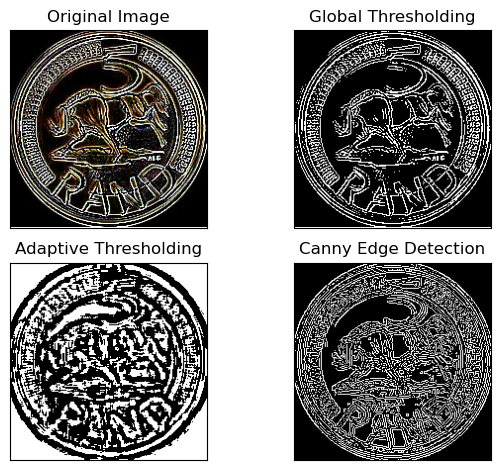

<DirEntry 'R5_O1.png'>
R5
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\R5_O1_preprocessed.jpg


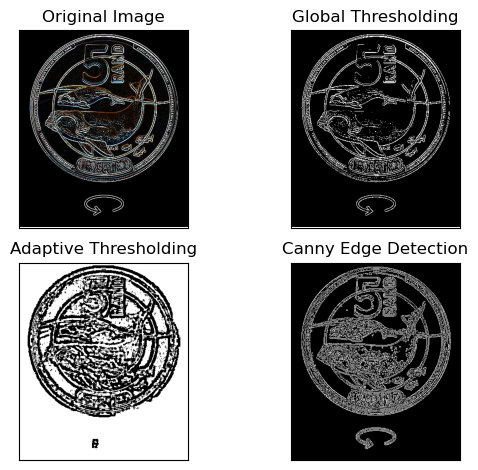

<DirEntry 'R5_RA.png'>
R5
Preprocessed image saved: C:/Users/noluv/Downloads/preprocessed_Images\R5_RA_preprocessed.jpg


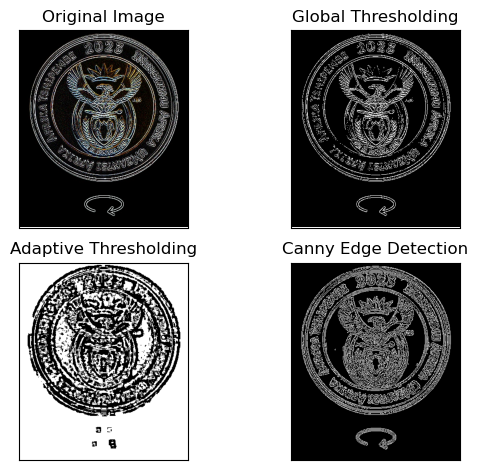

27


In [7]:

features=[]
labels=[]
for entry in os.scandir(input_directory):
    print(entry)
    if entry.is_file():
        # Check if the file is an image
        image_type = imghdr.what(entry.path)
        if image_type in ['jpeg', 'png']:
            # Extract the class label from the image file name
            image_name = os.path.splitext(entry.name)[0]
            
            if image_name == 'C' or image_name == 'Coins':
                class_label = 'mixture'
            elif '20c' in image_name:
                class_label = '20c'
            elif '10c' in image_name:
                class_label = '10c'
            elif 'R1' in image_name:
                class_label = 'R1'
            elif 'R2' in image_name:
                class_label = 'R2'
            elif 'R5' in image_name or '55' in image_name :
                class_label = 'R5'
            else:
                # Default label if no specific pattern matches
                class_label = 'unknown'
            
            print(class_label)

            # Preprocess the image
            preprocessed_image = preprocess_image(entry.path)

            # Save the preprocessed image to the output directory
            filename = os.path.splitext(entry.name)[0]
            output_path = os.path.join(output_directory, f'{filename}_preprocessed.jpg')
            cv2.imwrite(output_path, preprocessed_image)
            print('Preprocessed image saved:', output_path)

            # Perform image segmentation
            thresh1, thresh2, edges = image_segmentation(output_path)

            # Perform feature extraction
            perimeter, area = feature_extraction(thresh1)

            # Add the features and label to the lists
            features.append([perimeter, area])
            labels.append(class_label)  # Add the extracted class label

# Convert the lists to numpy arrays
X = np.array(features)
y = np.array(labels)
print(len(y))


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)

# Train the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate the accuracy of the SVM classifier
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy:', svm_accuracy)



SVM Accuracy: 0.2727272727272727
